In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Canadian Food Prices Data

In [2]:
df_food = pd.read_csv('../Data/Canadian_Food_Prices.csv')

In [3]:
df_food.tail()

REF_DATE               GEO        DGUID  \
103969  2024-02  British Columbia  2016A000259   
103970  2024-02  British Columbia  2016A000259   
103971  2024-02  British Columbia  2016A000259   
103972  2024-02  British Columbia  2016A000259   
103973  2024-02  British Columbia  2016A000259   

                              Products      UOM  UOM_ID SCALAR_FACTOR  \
103969     Sunflower seeds, 400 grams   Dollars      81         units   
103970             Deodorant, 85 grams  Dollars      81         units   
103971     Toothpaste, 100 millilitres  Dollars      81         units   
103972        Shampoo, 400 millilitres  Dollars      81         units   
103973  Laundry detergent, 4.43 litres  Dollars      81         units   

        SCALAR_ID       VECTOR  COORDINATE  VALUE  STATUS  SYMBOL  TERMINATED  \
103969          0  v1458870265      10.109   4.45     NaN     NaN         NaN   
103970          0  v1353834714      10.750   7.64     NaN     NaN         NaN   
103971          0  v1353834715      10.760   4.08     NaN     NaN         NaN   
103972          0  v1353834716      10.770   6.70     NaN     NaN         NaN   
103973          0  v1458870250      10.110  17.40     NaN     NaN         NaN   

        DECIMALS  
103969         2  
103970         2  
103971         2  
103972         2  
103973         2

In [4]:
# Verify the areas for which we have data

df_food['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia'], dtype=object)

In [5]:
# Drop unneccessary columns

df_food.drop(columns=df_food.columns.difference(['REF_DATE', 'GEO', 'Products', 'VALUE']), inplace = True)

df_food.head()

REF_DATE     GEO                             Products  VALUE
0  2017-01  Canada      Beef stewing cuts, per kilogram  12.66
1  2017-01  Canada    Beef striploin cuts, per kilogram  21.94
2  2017-01  Canada  Beef top sirloin cuts, per kilogram  13.44
3  2017-01  Canada          Beef rib cuts, per kilogram  20.17
4  2017-01  Canada            Ground beef, per kilogram   9.12

In [6]:
# Rename columns

df_food.rename(columns={'REF_DATE': 'Date', 'GEO': 'Location', 'VALUE': 'Price'}, inplace=True)

df_food.head()

Date Location                             Products  Price
0  2017-01   Canada      Beef stewing cuts, per kilogram  12.66
1  2017-01   Canada    Beef striploin cuts, per kilogram  21.94
2  2017-01   Canada  Beef top sirloin cuts, per kilogram  13.44
3  2017-01   Canada          Beef rib cuts, per kilogram  20.17
4  2017-01   Canada            Ground beef, per kilogram   9.12

In [7]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103974 entries, 0 to 103973
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      103974 non-null  object 
 1   Location  103974 non-null  object 
 2   Products  103974 non-null  object 
 3   Price     103974 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.2+ MB


In [8]:
df_food['Date'].unique()

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', 

In [9]:
# Convert the Date column to datetime format with year and month

df_food['Date'] = pd.to_datetime(df_food['Date'])

df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103974 entries, 0 to 103973
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      103974 non-null  datetime64[ns]
 1   Location  103974 non-null  object        
 2   Products  103974 non-null  object        
 3   Price     103974 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


In [10]:
# Round Prices to 2 decimal places

#df_food['Price'] = df_food['Price'].round(2)

df_food.head()

Date Location                             Products  Price
0 2017-01-01   Canada      Beef stewing cuts, per kilogram  12.66
1 2017-01-01   Canada    Beef striploin cuts, per kilogram  21.94
2 2017-01-01   Canada  Beef top sirloin cuts, per kilogram  13.44
3 2017-01-01   Canada          Beef rib cuts, per kilogram  20.17
4 2017-01-01   Canada            Ground beef, per kilogram   9.12

### Cleaning Up Products

In [11]:
df_food['Products'].unique()

array(['Beef stewing cuts, per kilogram',
       'Beef striploin cuts, per kilogram',
       'Beef top sirloin cuts, per kilogram',
       'Beef rib cuts, per kilogram', 'Ground beef, per kilogram',
       'Pork loin cuts, per kilogram', 'Pork rib cuts, per kilogram',
       'Pork shoulder cuts, per kilogram', 'Whole chicken, per kilogram',
       'Chicken breasts, per kilogram', 'Chicken thigh, per kilogram',
       'Chicken drumsticks, per kilogram', 'Bacon, 500 grams',
       'Wieners, 400 grams', 'Salmon, per kilogram', 'Shrimp, 300 grams',
       'Canned salmon, 213 grams', 'Canned tuna, 170 grams',
       'Meatless burgers, 226 grams', 'Milk, 1 litre', 'Milk, 2 litres',
       'Milk, 4 litres', 'Soy milk, 1.89 litres', 'Nut milk, 1.89 litres',
       'Cream, 1 litre', 'Butter, 454 grams', 'Margarine, 907 grams',
       'Block cheese, 500 grams', 'Yogurt, 500 grams', 'Eggs, 1 dozen',
       'Apples, per kilogram', 'Oranges, per kilogram',
       'Oranges, 1.36 kilograms', 'Bananas

In [12]:
len(df_food['Products'].unique())

110

In [13]:
# Group together the various meat cuts for simplicity

def group_foods(x):
    if 'beef' in x or 'Beef' in x:
        return 'Beef, per kg'
    if 'chicken' in x or 'Chicken' in x:
        return 'Chicken, per kg'
    if 'pork' in x or 'Pork' in x:
        return 'Pork, per kg'
    else:
        return x
    
df_food['Products'] = df_food['Products'].apply(group_foods)

In [14]:
len(df_food['Products'].unique())

101

In [15]:
df_food['Products'].unique()

array(['Beef, per kg', 'Pork, per kg', 'Chicken, per kg',
       'Bacon, 500 grams', 'Wieners, 400 grams', 'Salmon, per kilogram',
       'Shrimp, 300 grams', 'Canned salmon, 213 grams',
       'Canned tuna, 170 grams', 'Meatless burgers, 226 grams',
       'Milk, 1 litre', 'Milk, 2 litres', 'Milk, 4 litres',
       'Soy milk, 1.89 litres', 'Nut milk, 1.89 litres', 'Cream, 1 litre',
       'Butter, 454 grams', 'Margarine, 907 grams',
       'Block cheese, 500 grams', 'Yogurt, 500 grams', 'Eggs, 1 dozen',
       'Apples, per kilogram', 'Oranges, per kilogram',
       'Oranges, 1.36 kilograms', 'Bananas, per kilogram',
       'Pears, per kilogram', 'Lemons, unit', 'Limes, unit',
       'Grapes, per kilogram', 'Cantaloupe, unit',
       'Strawberries, 454 grams', 'Avocado, unit',
       'Potatoes, 4.54 kilograms', 'Potatoes, per kilogram',
       'Sweet potatoes, per kilogram', 'Tomatoes, per kilogram',
       'Cabbage, per kilogram', 'Carrots, 1.36 kilograms',
       'Onions, per kilogra

In [16]:
df_food[(df_food['Products'] == 'Beef, per kg') & (df_food['Date'] == '2017-01')]

Date                   Location      Products  Price
0    2017-01-01                     Canada  Beef, per kg  12.66
1    2017-01-01                     Canada  Beef, per kg  21.94
2    2017-01-01                     Canada  Beef, per kg  13.44
3    2017-01-01                     Canada  Beef, per kg  20.17
4    2017-01-01                     Canada  Beef, per kg   9.12
110  2017-01-01  Newfoundland and Labrador  Beef, per kg  13.57
111  2017-01-01  Newfoundland and Labrador  Beef, per kg  16.51
112  2017-01-01  Newfoundland and Labrador  Beef, per kg  12.09
113  2017-01-01  Newfoundland and Labrador  Beef, per kg  24.63
114  2017-01-01  Newfoundland and Labrador  Beef, per kg   8.13
219  2017-01-01       Prince Edward Island  Beef, per kg  13.33
220  2017-01-01       Prince Edward Island  Beef, per kg  17.08
221  2017-01-01       Prince Edward Island  Beef, per kg  13.50
222  2017-01-01       Prince Edward Island  Beef, per kg  22.04
223  2017-01-01       Prince Edward Island  Beef, per kg   7.95
329  2017-01-01                Nova Scotia  Beef, per kg  13.12
330  2017-01-01                Nova Scotia  Beef, per kg  16.23
331  2017-01-01                Nova Scotia  Beef, per kg  13.79
332  2017-01-01                Nova Scotia  Beef, per kg  16.76
333  2017-01-01                Nova Scotia  Beef, per kg   7.88
439  2017-01-01              New Brunswick  Beef, per kg  13.33
440  2017-01-01              New Brunswick  Beef, per kg  16.20
441  2017-01-01              New Brunswick  Beef, per kg  13.74
442  2017-01-01              New Brunswick  Beef, per kg  17.67
443  2017-01-01              New Brunswick  Beef, per kg   8.11
549  2017-01-01                     Quebec  Beef, per kg  12.20
550  2017-01-01                     Quebec  Beef, per kg  21.41
551  2017-01-01                     Quebec  Beef, per kg  15.54
552  2017-01-01                     Quebec  Beef, per kg  28.90
553  2017-01-01                     Quebec  Beef, per kg   9.13
659  2017-01-01                    Ontario  Beef, per kg  12.67
660  2017-01-01                    Ontario  Beef, per kg  25.28
661  2017-01-01                    Ontario  Beef, per kg  12.36
662  2017-01-01                    Ontario  Beef, per kg  22.63
663  2017-01-01                    Ontario  Beef, per kg  10.04
769  2017-01-01                   Manitoba  Beef, per kg  12.38
770  2017-01-01                   Manitoba  Beef, per kg  20.70
771  2017-01-01                   Manitoba  Beef, per kg  13.68
772  2017-01-01                   Manitoba  Beef, per kg  17.96
773  2017-01-01                   Manitoba  Beef, per kg   8.70
879  2017-01-01               Saskatchewan  Beef, per kg  12.54
880  2017-01-01               Saskatchewan  Beef, per kg  20.08
881  2017-01-01               Saskatchewan  Beef, per kg  12.77
882  2017-01-01               Saskatchewan  Beef, per kg  17.66
883  2017-01-01               Saskatchewan  Beef, per kg   8.57
989  2017-01-01                    Alberta  Beef, per kg  12.77
990  2017-01-01                    Alberta  Beef, per kg  22.92
991  2017-01-01                    Alberta  Beef, per kg  13.79
992  2017-01-01                    Alberta  Beef, per kg  18.34
993  2017-01-01                    Alberta  Beef, per kg   9.08
1099 2017-01-01           British Columbia  Beef, per kg  12.56
1100 2017-01-01           British Columbia  Beef, per kg  23.32
1101 2017-01-01           British Columbia  Beef, per kg  14.33
1102 2017-01-01           British Columbia  Beef, per kg  18.47
1103 2017-01-01           British Columbia  Beef, per kg   8.97

In [17]:
# Group the data by Date, Location, and Product, and calculating the mean price
df_food = df_food.groupby(['Date', 'Location', 'Products'], as_index=False)['Price'].mean()

df_food[(df_food['Products'] == 'Beef, per kg') & (df_food['Date'] == '2017-01')]

Date                   Location      Products   Price
7    2017-01-01                    Alberta  Beef, per kg  15.380
108  2017-01-01           British Columbia  Beef, per kg  15.530
209  2017-01-01                     Canada  Beef, per kg  15.466
310  2017-01-01                   Manitoba  Beef, per kg  14.684
411  2017-01-01              New Brunswick  Beef, per kg  13.810
512  2017-01-01  Newfoundland and Labrador  Beef, per kg  14.986
612  2017-01-01                Nova Scotia  Beef, per kg  13.556
713  2017-01-01                    Ontario  Beef, per kg  16.596
814  2017-01-01       Prince Edward Island  Beef, per kg  14.780
915  2017-01-01                     Quebec  Beef, per kg  17.436
1016 2017-01-01               Saskatchewan  Beef, per kg  14.324

In [18]:
# Milk Cleanup

milk_rows = df_food[(df_food['Products'].str.contains('Milk')) & 
                    (df_food['Location'] == 'Canada') & 
                    (df_food['Date'] == '2017-01')]

milk_rows

Date Location        Products  Price
260 2017-01-01   Canada   Milk, 1 litre   2.17
261 2017-01-01   Canada  Milk, 2 litres   4.04
262 2017-01-01   Canada  Milk, 4 litres   5.13

Because Milk prices vary so much per size, I will keep the individual values for 1, 2 and 4 litres.

In [19]:
# Saving cleaned up df_food as a csv file

file_path = '../Data/df_food.csv'

df_food.to_csv(file_path, index = False)

### Grouping Foods Together

In [20]:
# Meats and Alternatives
meat_items = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg',
                  'Bacon, 500 grams', 'Wieners, 400 grams', 'Salmon, per kilogram',
                  'Shrimp, 300 grams', 'Canned salmon, 213 grams',
                  'Canned tuna, 170 grams', 'Meatless burgers, 226 grams', 'Tofu, 350 grams ']

# Dairy

dairy_items = ['Milk, 1 litre', 'Milk, 2 litres', 'Milk, 4 litres',
       'Soy milk, 1.89 litres', 'Nut milk, 1.89 litres', 'Cream, 1 litre',
       'Butter, 454 grams', 'Margarine, 907 grams',
       'Block cheese, 500 grams', 'Yogurt, 500 grams', 'Eggs, 1 dozen']


#Frozen

frozen_items = ['Frozen french fried potatoes, 750 grams',
       'Frozen green beans, 750 grams', 'Frozen broccoli, 500 grams',
       'Frozen corn, 750 grams ', 'Frozen mixed vegetables, 750 grams ',
       'Frozen peas, 750 grams', 'Frozen pizza, 390 grams',
       'Frozen spinach, 300 grams', 'Frozen strawberries, 600 grams']

# Fruits and Vegetables

veggie_items = ['Apples, per kilogram', 'Oranges, per kilogram',
       'Oranges, 1.36 kilograms', 'Bananas, per kilogram',
       'Pears, per kilogram', 'Lemons, unit', 'Limes, unit',
       'Grapes, per kilogram', 'Cantaloupe, unit',
       'Strawberries, 454 grams', 'Avocado, unit',
       'Potatoes, 4.54 kilograms', 'Potatoes, per kilogram',
       'Sweet potatoes, per kilogram', 'Tomatoes, per kilogram',
       'Cabbage, per kilogram', 'Carrots, 1.36 kilograms',
       'Onions, per kilogram', 'Onions, 1.36 kilograms', 'Celery, unit',
       'Cucumber, unit', 'Mushrooms, 227 grams', 'Iceberg lettuce, unit',
       'Romaine lettuce, unit', 'Broccoli, unit', 'Peppers, per kilogram',
       'Squash, per kilogram', 'Salad greens, 142 grams']

# Grains

grain_items = ['White bread, 675 grams', 'Flatbread and pita, 500 grams ',
       'Crackers and crisp breads, 200 grams ',
       'Dry or fresh pasta, 500 grams', 'Brown rice, 900 grams ',
       'White rice, 2 kilograms', 'Wheat flour, 2.5 kilograms']

# Pantry Items

pantry_items = ['Cereal, 400 grams', 'White sugar, 2 kilograms',
       'Apple juice, 2 litres', 'Orange juice, 2 litres',
       'Roasted or ground coffee, 340 grams', 'Tea (20 bags)',
       'Ketchup, 1 litre', 'Vegetable oil, 3 litres',
       'Canola oil, 3 litres', 'Olive oil, 1 litre',
       'Baby food, 128 millilitres', 'Infant formula, 900 grams ',
       'Peanut butter, 1 kilogram', 'Mayonnaise, 890 millilitres ',
       'Cookies and sweet biscuits, 300 grams ', 'Hummus, 227 grams', 'Salsa, 418 millilitres',
       'Pasta sauce, 650 millilitres', 'Salad dressing, 475 millilitres',
       'Almonds, 200 grams', 'Peanuts, 450 grams',
       'Sunflower seeds, 400 grams ']

# Shelf Stable Goods

shelf_items = ['Canned baked beans, 398 millilitres',
       'Canned tomatoes, 796 millilitres', 'Canned soup, 284 millilitres',
       'Canned beans and lentils, 540 millilitres',
       'Canned corn, 341 millilitres', 'Canned peach, 398 millilitres',
       'Canned pear, 398 millilitres', 'Dried lentils, 900 grams',
       'Dry beans and legumes, 900 grams ']

# Household

household_items = ['Deodorant, 85 grams',
       'Toothpaste, 100 millilitres', 'Shampoo, 400 millilitres',
       'Laundry detergent, 4.43 litres']

# Employment Data

In [21]:
df_empl = pd.read_csv('../Data/Employment.csv')

df_empl.head()

REF_DATE     GEO           DGUID Labour force characteristics         Sex  \
0  2017-01  Canada  2016A000011124            Unemployment rate  Both sexes   
1  2017-02  Canada  2016A000011124            Unemployment rate  Both sexes   
2  2017-03  Canada  2016A000011124            Unemployment rate  Both sexes   
3  2017-04  Canada  2016A000011124            Unemployment rate  Both sexes   
4  2017-05  Canada  2016A000011124            Unemployment rate  Both sexes   

           Age group Statistics            Data type         UOM  UOM_ID  \
0  15 years and over   Estimate  Seasonally adjusted  Percentage     242   
1  15 years and over   Estimate  Seasonally adjusted  Percentage     242   
2  15 years and over   Estimate  Seasonally adjusted  Percentage     242   
3  15 years and over   Estimate  Seasonally adjusted  Percentage     242   
4  15 years and over   Estimate  Seasonally adjusted  Percentage     242   

  SCALAR_FACTOR  SCALAR_ID    VECTOR   COORDINATE  VALUE  STATUS  SYMBOL  \
0         units          0  v2062815  1.7.1.1.1.1    6.8     NaN     NaN   
1         units          0  v2062815  1.7.1.1.1.1    6.6     NaN     NaN   
2         units          0  v2062815  1.7.1.1.1.1    6.7     NaN     NaN   
3         units          0  v2062815  1.7.1.1.1.1    6.5     NaN     NaN   
4         units          0  v2062815  1.7.1.1.1.1    6.6     NaN     NaN   

   TERMINATED  DECIMALS  
0         NaN         1  
1         NaN         1  
2         NaN         1  
3         NaN         1  
4         NaN         1

In [22]:
df_empl.drop(columns=df_empl.columns.difference(['REF_DATE', 'GEO', 'VALUE']), inplace = True)

df_empl.tail()

REF_DATE               GEO  VALUE
941  2023-10  British Columbia    5.3
942  2023-11  British Columbia    5.3
943  2023-12  British Columbia    5.5
944  2024-01  British Columbia    5.4
945  2024-02  British Columbia    5.2

In [23]:
# Rename columns
df_empl.rename(columns={'REF_DATE': 'Date', 'GEO': 'Location', 'VALUE': 'Unemp_Rate'}, inplace=True)

df_empl.head()

Date Location  Unemp_Rate
0  2017-01   Canada         6.8
1  2017-02   Canada         6.6
2  2017-03   Canada         6.7
3  2017-04   Canada         6.5
4  2017-05   Canada         6.6

In [24]:
df_empl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        946 non-null    object 
 1   Location    946 non-null    object 
 2   Unemp_Rate  946 non-null    float64
dtypes: float64(1), object(2)
memory usage: 22.3+ KB


In [25]:
# Convert the Date column to datetime format with year and month

df_empl['Date'] = pd.to_datetime(df_empl['Date'])

df_empl.head()

Date Location  Unemp_Rate
0 2017-01-01   Canada         6.8
1 2017-02-01   Canada         6.6
2 2017-03-01   Canada         6.7
3 2017-04-01   Canada         6.5
4 2017-05-01   Canada         6.6

In [26]:
df_empl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        946 non-null    datetime64[ns]
 1   Location    946 non-null    object        
 2   Unemp_Rate  946 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 22.3+ KB


# Visualizations

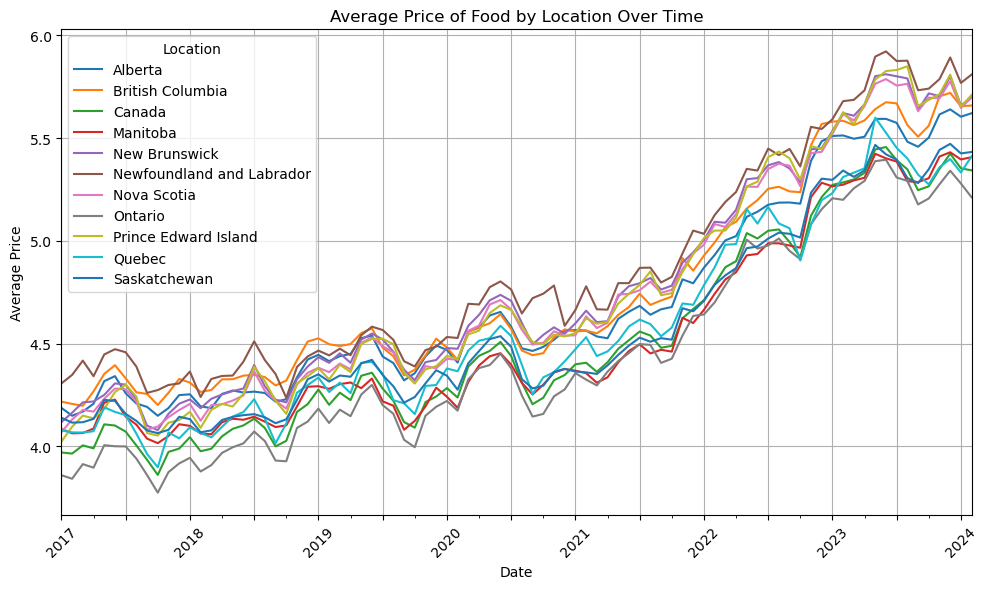

In [27]:
import matplotlib.pyplot as plt

# Group the data by Date and Location and calculate the mean price
grouped_data = df_food.groupby(['Date', 'Location'])['Price'].mean().unstack()


grouped_data.plot(kind='line', figsize=(10, 6))
plt.title('Average Price of Food by Location Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Location', loc='upper left')
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()


In [44]:
# Using plotly

grouped_data = df_food.groupby(['Date', 'Location'])['Price'].mean().unstack().reset_index()

# Create a line plot using Plotly
fig = px.line(grouped_data, x='Date', y=grouped_data.columns[1:], title='Average Price of Food by Location Over Time')

# Update layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Average Price',
    legend_title='Location',
    xaxis=dict(
        tickmode='linear',
        tick0=grouped_data['Date'].min(),
        dtick='M6',
        tickformat='%Y-%m'
    ),
    xaxis_tickangle=-45,
    margin=dict(l=40, r=40, t=40, b=40)
)

# Show the plot
fig.show()

### Plot By Location

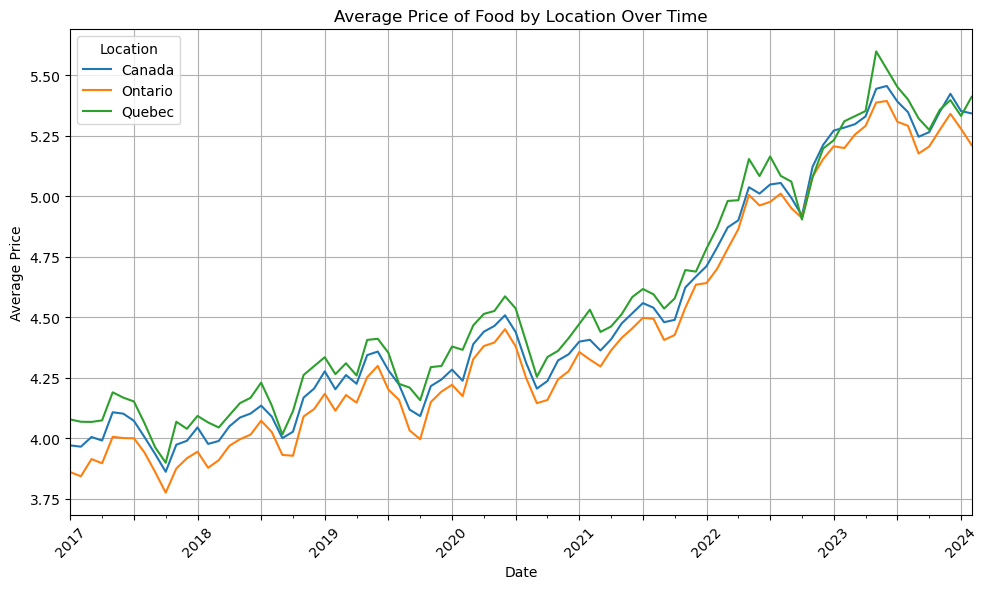

In [28]:
# Include only specified locations

# List of locations to include
locations = ['Canada', 'Quebec', 'Ontario']

filtered_data = df_food[df_food['Location'].isin(locations)]

grouped_data = filtered_data.groupby(['Date', 'Location'])['Price'].mean().unstack()

grouped_data.plot(kind='line', figsize=(10, 6))
plt.title('Average Price of Food by Location Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Location', loc='upper left')
#plt.xticks(rotation=45)
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()

### Plot by Product Categories

List of possible items: 
- meat_items
- dairy_items
- frozen_items
- veggie_items
- grain_items
- pantry_items
- shelf_items
- household_items

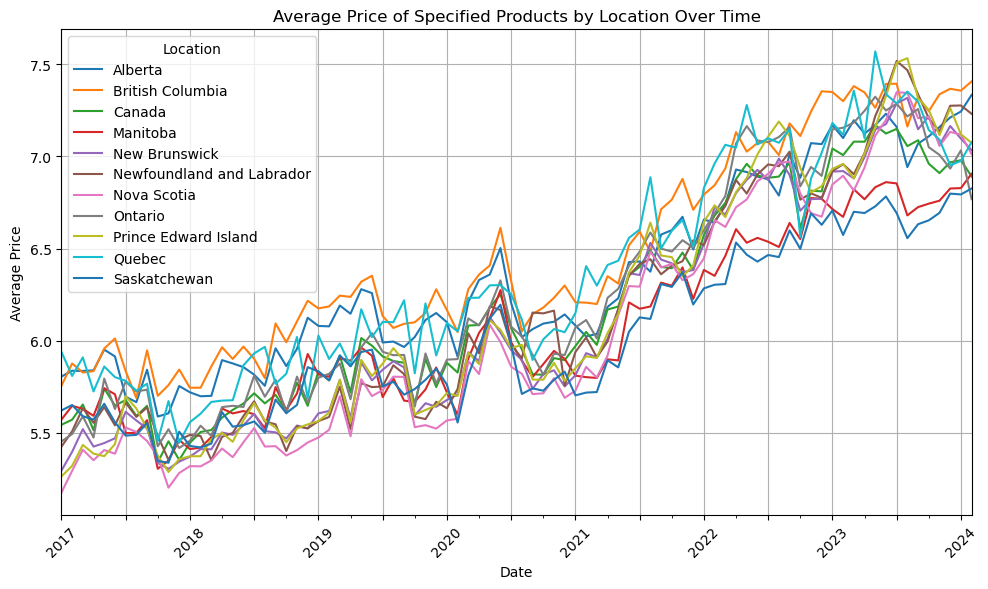

In [29]:
food = dairy_items + meat_items


filtered_data = df_food[df_food['Products'].isin(food)]


grouped_data = filtered_data.groupby(['Date', 'Location'])['Price'].mean().unstack()


grouped_data.plot(kind='line', figsize=(10, 6))
plt.title('Average Price of Specified Products by Location Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Location', loc='upper left')
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()


### Filter by Location and Products

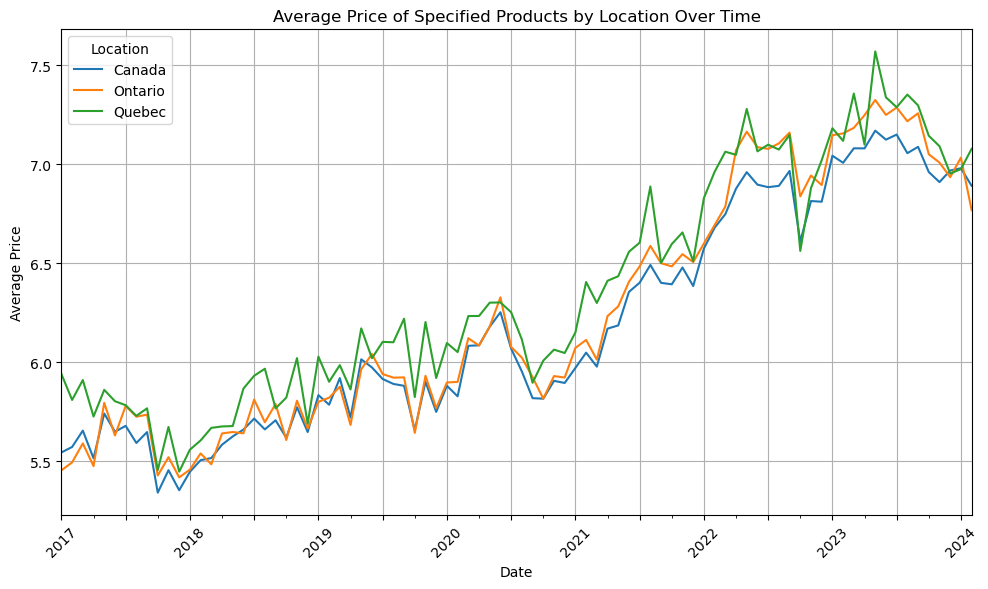

In [30]:
locations = ['Canada', 'Quebec', 'Ontario']
food = dairy_items + meat_items

filtered_data = df_food[df_food['Location'].isin(locations) & df_food['Products'].isin(food)]


grouped_data = filtered_data.groupby(['Date', 'Location'])['Price'].mean().unstack()


grouped_data.plot(kind='line', figsize=(10, 6))
plt.title('Average Price of Specified Products by Location Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Location', loc='upper left')
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()

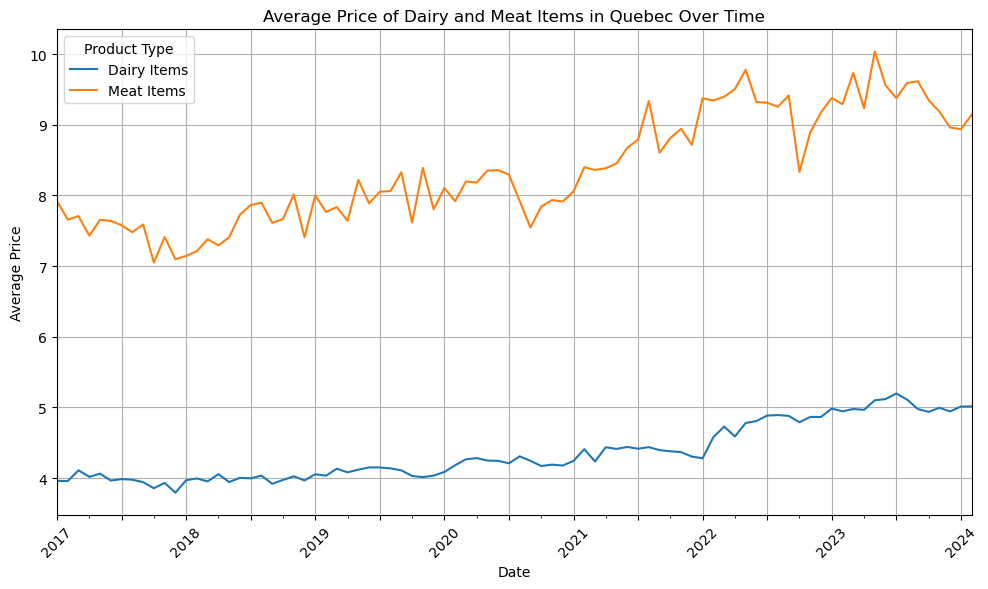

In [31]:
# Plot specified items by one location, multiple products

location = 'Quebec'

food = dairy_items + meat_items

filtered_data = df_food[(df_food['Location'] == location) & df_food['Products'].isin(food)]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot dairy items
dairy_data = filtered_data[filtered_data['Products'].isin(dairy_items)]
dairy_data.groupby('Date')['Price'].mean().plot(ax=ax, label='Dairy Items')

# Plot meat items
meat_data = filtered_data[filtered_data['Products'].isin(meat_items)]
meat_data.groupby('Date')['Price'].mean().plot(ax=ax, label='Meat Items')

plt.title(f'Average Price of Dairy and Meat Items in {location} Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Product Type', loc='upper left')
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()


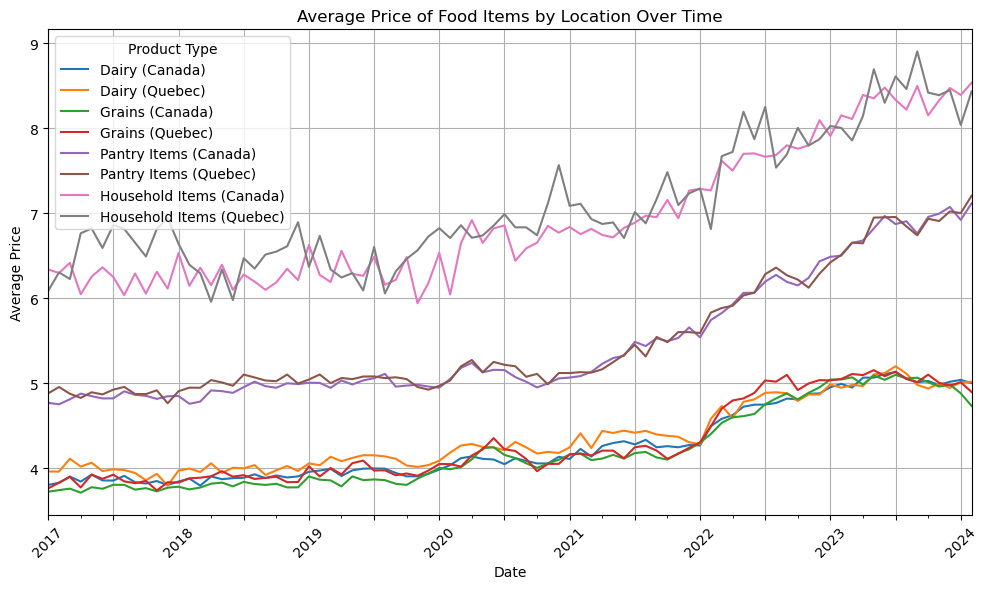

In [32]:
# Multiple Products, multiple locations

# Define the dictionary
food_categories = {
    'Dairy': dairy_items,
    #'Meat': meat_items,
    #'Frozen': frozen_items,
    #'Fruits and Vegetables': veggie_items,
    'Grains': grain_items,
    'Pantry Items': pantry_items,
    #'Shelf Items': shelf_items,
    'Household Items': household_items
}

locations = ['Canada', 'Quebec']

# Filter the DataFrame
filtered_data = df_food[df_food['Location'].isin(locations)]

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over each food category
for category, items in food_categories.items():
    # Loop over each location
    for location in locations:
        # Filter the data for the current location and category
        location_data = filtered_data[(filtered_data['Location'] == location) & 
                                      (filtered_data['Products'].isin(items))]
        
        # Plot data for the current location and category
        location_data.groupby('Date')['Price'].mean().plot(ax=ax, label=f'{category} ({location})')

plt.title('Average Price of Food Items by Location Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Product Type', loc='upper left')
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()

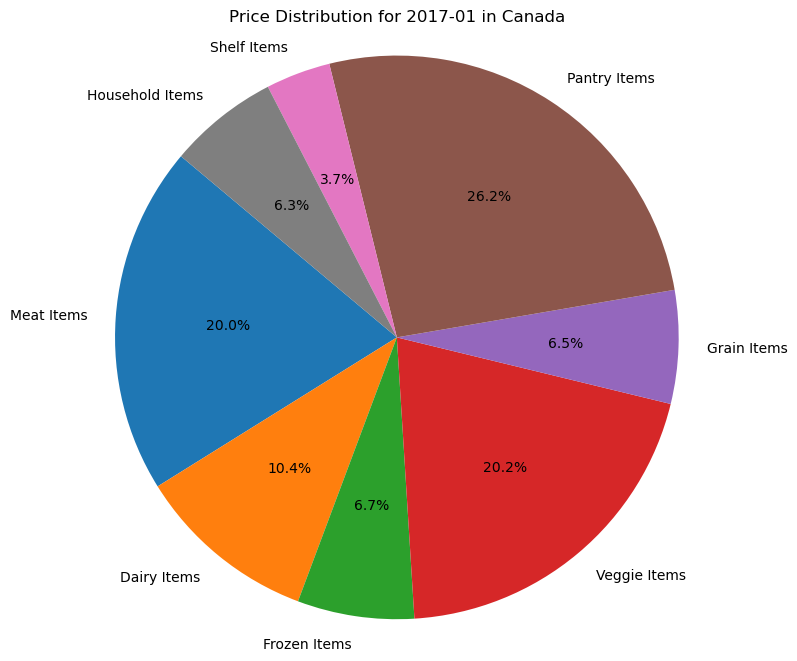

In [33]:
import matplotlib.pyplot as plt

# Chose the Location and Month
geo = 'Canada'
date = '2017-01'

food_items_lists = [
    ('Meat Items', meat_items),
    ('Dairy Items', dairy_items),
    ('Frozen Items', frozen_items),
    ('Veggie Items', veggie_items),
    ('Grain Items', grain_items),
    ('Pantry Items', pantry_items),
    ('Shelf Items', shelf_items),
    ('Household Items', household_items)
]

# Initialize a dictionary to store the sum of prices for each food item list
total_prices = {}

# Calculate the sum of prices for each food item list
for list_name, items_list in food_items_lists:
    total_price = df_food[(df_food['Location'] == geo) & (df_food['Date'] == date) & (df_food['Products'].isin(items_list))]['Price'].sum()
    # Set the label to be the name of the list
    total_prices[list_name] = total_price

plt.figure(figsize=(8, 8))
plt.pie(total_prices.values(), labels=total_prices.keys(), autopct='%1.1f%%', startangle=140)
plt.title(f'Price Distribution for {date} in {geo}')
plt.axis('equal')
plt.show()


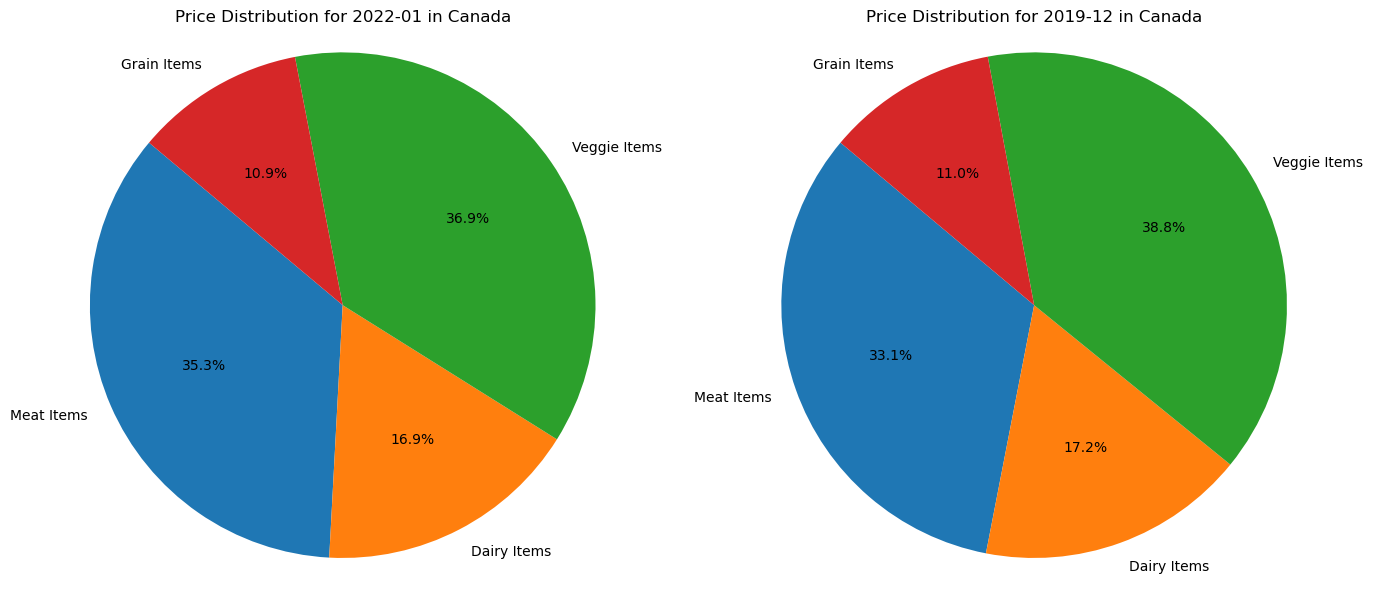

In [34]:
import matplotlib.pyplot as plt

# Chose the desired Location and Dates
geo = 'Canada'
date1 = '2022-01'
date2 = '2019-12'

food_items_lists = [
    ('Meat Items', meat_items),
    ('Dairy Items', dairy_items),
    #('Frozen Items', frozen_items),
    ('Veggie Items', veggie_items),
    ('Grain Items', grain_items),
    #('Pantry Items', pantry_items),
    #('Shelf Items', shelf_items),
    #('Household Items', household_items)
]

# Initialize dictionaries to store the sum of prices for each food item list for each date
total_prices_date1 = {}
total_prices_date2 = {}

# Calculate the sum of prices for each food item list for each date
for list_name, items_list in food_items_lists:
    total_price_date1 = df_food[(df_food['Location'] == geo) & (df_food['Date'] == date1) & (df_food['Products'].isin(items_list))]['Price'].sum()
    total_price_date2 = df_food[(df_food['Location'] == geo) & (df_food['Date'] == date2) & (df_food['Products'].isin(items_list))]['Price'].sum()
    # Set the label to be the name of the list
    total_prices_date1[list_name] = total_price_date1
    total_prices_date2[list_name] = total_price_date2

# Create subplots with two pie charts side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Create pie chart for date1
axs[0].pie(total_prices_date1.values(), labels=total_prices_date1.keys(), autopct='%1.1f%%', startangle=140)
axs[0].set_title(f'Price Distribution for {date1} in {geo}')
axs[0].axis('equal')

# Create pie chart for date2
axs[1].pie(total_prices_date2.values(), labels=total_prices_date2.keys(), autopct='%1.1f%%', startangle=140)
axs[1].set_title(f'Price Distribution for {date2} in {geo}')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


In [35]:
def get_prices_sum(products, location, date1, date2):
    # Filter the DataFrame to include only the specified products, location, and dates
    filtered_data = df_food[(df_food['Products'].isin(products)) & 
                            (df_food['Location'] == location) & 
                            ((df_food['Date'] == date1) | (df_food['Date'] == date2))]
    
    # Group the filtered data by 'Date' and sum the prices for all products
    grouped_data = filtered_data.groupby('Date')['Price'].sum()
    
    # Extract sum of prices for the two specified dates
    price_sum_date1 = grouped_data.loc[date1]
    price_sum_date2 = grouped_data.loc[date2]
    
    return price_sum_date1, price_sum_date2

# Chosen Products, Location, Dates
products = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg']
location = 'Canada'
date1 = '2017-01'
date2 = '2017-02'

price_sum_date1, price_sum_date2 = get_prices_sum(products, location, date1, date2)
print("Location: ", location)
print("Sum of prices for", date1, ":", price_sum_date1)
print("Sum of prices for", date2, ":", price_sum_date2)


Location:  Canada
Sum of prices for 2017-01 : Date
2017-01-01    29.8185
Name: Price, dtype: float64
Sum of prices for 2017-02 : Date
2017-02-01    30.052167
Name: Price, dtype: float64


In [36]:
price_sum_date1

Date
2017-01-01    29.8185
Name: Price, dtype: float64

In [37]:



def get_prices_sum(products, location, date1, date2):
    # Filter the DataFrame to include only the specified products, location, and dates
    filtered_data = df_food[(df_food['Products'].isin(products)) & 
                            (df_food['Location'] == location) & 
                            ((df_food['Date'] == date1) | (df_food['Date'] == date2))]
    
    # Group the filtered data by 'Date' and sum the prices for all products
    grouped_data = filtered_data.groupby('Date')['Price'].sum()
    
    # Extract sum of prices for the two specified dates
    price_sum_date1 = round(grouped_data.loc[date1], 2)
    price_sum_date2 = round(grouped_data.loc[date2], 2)
    
    return price_sum_date1, price_sum_date2

# Example usage
products = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg']
location = 'Canada'
date1 = '2017-01'
date2 = '2017-02'

price_sum_date1, price_sum_date2 = get_prices_sum(products, location, date1, date2)
print("Location: ", location)
print("Sum of prices for", date1 + ":", price_sum_date1.item())
print("Sum of prices for", date2 + ":", price_sum_date2.item())


Location:  Canada
Sum of prices for 2017-01: 29.82
Sum of prices for 2017-02: 30.05


In [38]:
# Define the location, products, and dates
location = 'Canada'
products = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg']
date1 = '2017-01'
date2 = '2017-02'

def get_prices_sum(products, location, date1, date2):
    # Filter the DataFrame to include only the specified products, location, and dates
    filtered_data = df_food[(df_food['Products'].isin(products)) & 
                            (df_food['Location'] == location) & 
                            ((df_food['Date'] == date1) | (df_food['Date'] == date2))]
    
    # Group the filtered data by 'Date' and sum the prices for all products
    grouped_data = filtered_data.groupby('Date')['Price'].sum()
    
    # Extract sum of prices for the two specified dates
    price_sum_date1 = round(grouped_data.loc[date1], 2)
    price_sum_date2 = round(grouped_data.loc[date2], 2)
    
    # Print statements within the function
    print("Location:", location)
    print("Sum of prices for", date1 + ":", price_sum_date1.item())
    print("Sum of prices for", date2 + ":", price_sum_date2.item())

# Example usage
get_prices_sum(products, location, date1, date2)


Location: Canada
Sum of prices for 2017-01: 29.82
Sum of prices for 2017-02: 30.05


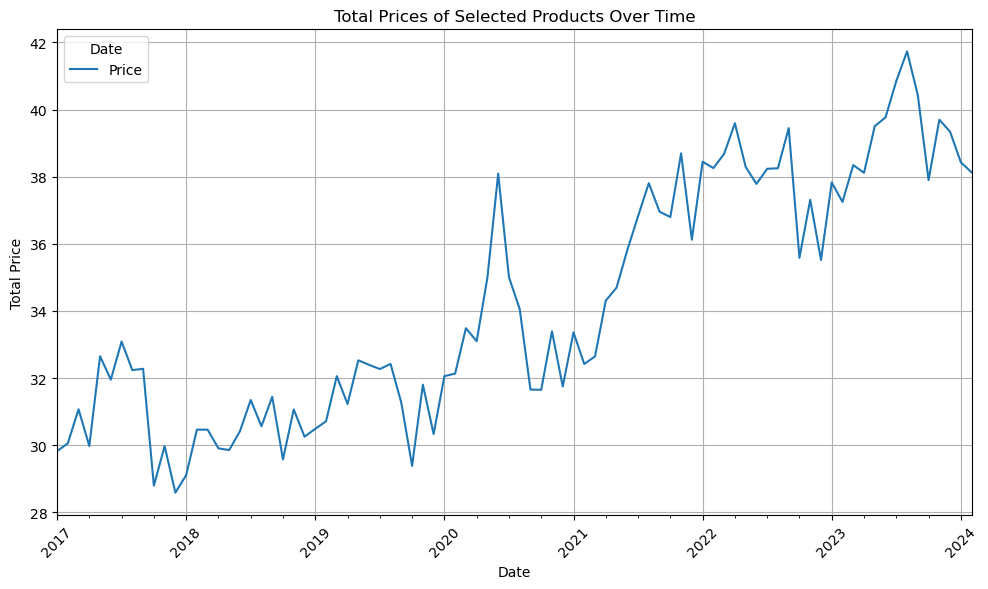

In [39]:
# Chose the location and products
location = 'Canada'
products = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg']

def plot_prices_sum(products, location):
    # Filter the DataFrame to include only the specified products and location
    filtered_data = df_food[(df_food['Products'].isin(products)) & 
                            (df_food['Location'] == location)]
    
    # Group the filtered data by 'Date' and sum the prices for all products
    grouped_data = filtered_data.groupby('Date')['Price'].sum()
    
    # Plot the graph
    grouped_data.plot(kind='line', figsize=(10, 6))
    plt.title('Total Prices of Selected Products Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Price')
    plt.grid(True)
    plt.legend(title='Date', loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function
plot_prices_sum(products, location)

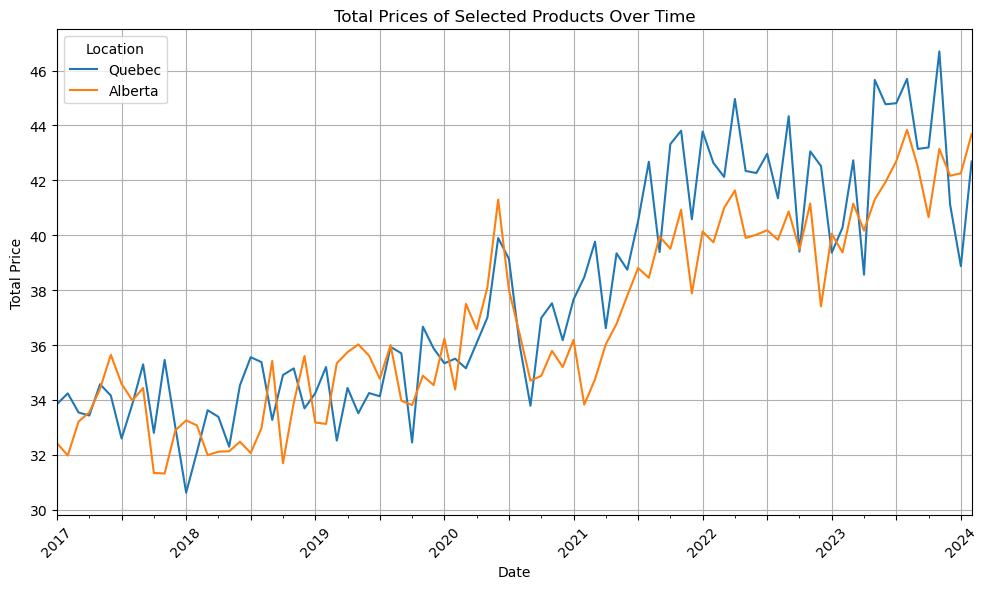

In [40]:
import matplotlib.pyplot as plt

def plot_prices_sum(products, locations):
    # Iterate over each location
    for location in locations:
        # Filter the DataFrame to include only the specified products and location
        filtered_data = df_food[(df_food['Products'].isin(products)) & 
                                (df_food['Location'] == location)]
        
        # Group the filtered data by 'Date' and sum the prices for all products
        grouped_data = filtered_data.groupby('Date')['Price'].sum()
        
        # Plot the graph for the current location
        grouped_data.plot(kind='line', figsize=(10, 6), label=location)

    plt.title('Total Prices of Selected Products Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Price')
    plt.grid(True)
    plt.legend(title='Location', loc='upper left')
    plt.xticks(pd.date_range(start=grouped_data.index.min(), 
                             end=grouped_data.index.max(), freq='6MS'), rotation=45)
    plt.tight_layout()
    plt.show()

# Chose locations and products
products = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg']
locations = ['Quebec', 'Alberta']

plot_prices_sum(products, locations)


In [41]:


def plot_prices_sum(products, locations):
    # Create an empty list to store traces (lines) for each location
    traces = []
    
    # Iterate over each location
    for location in locations:
        # Filter the DataFrame to include only the specified products and location
        filtered_data = df_food[(df_food['Products'].isin(products)) & 
                                (df_food['Location'] == location)]
        
        # Group the filtered data by 'Date' and sum the prices for all products
        grouped_data = filtered_data.groupby('Date')['Price'].sum()
        
        # Create a trace (line) for the current location
        trace = go.Scatter(x=grouped_data.index, y=grouped_data.values, mode='lines', name=location)
        traces.append(trace)

    # Specify layout options for the plot
    layout = go.Layout(title='Total Prices of Selected Products Over Time',
                       xaxis=dict(title='Date', tickangle=45),
                       yaxis=dict(title='Total Price'),
                       legend=dict(title='Location', orientation='h', x=0, y=1.1),
                       margin=dict(l=40, r=40, t=80, b=40),
                       hovermode='closest')

    # Plot the graph
    fig = go.Figure(data=traces, layout=layout)
    fig.show()

# Chose locations and products
products = ['Beef, per kg', 'Pork, per kg', 'Chicken, per kg']
locations = ['Quebec', 'Alberta']

plot_prices_sum(products, locations)
